<a href="https://colab.research.google.com/github/tamayodb/CCMACLRL_EXERCISES_COM222ML/blob/main/EXERCISE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## B. Load and understand the dataset

1. Display the summary of all the features of the dataset using `.info()`

In [5]:
dataframe = pd.read_csv("personality.csv")

In [6]:
dataframe.describe()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_folllowers,personality
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.540000,0.640000,0.540000,61.460000,0.600000
std,0.503457,0.484873,0.503457,30.138598,0.494872
min,0.000000,0.000000,0.000000,7.000000,0.000000
25%,0.000000,0.000000,0.000000,40.000000,0.000000
50%,1.000000,1.000000,1.000000,60.000000,1.000000
75%,1.000000,1.000000,1.000000,88.750000,1.000000
max,1.000000,1.000000,1.000000,111.000000,1.000000


In [8]:
dataframe.head()

,name,posts_frequently,active_in_social_media,replies_to_comments,number_of_folllowers,personality
0,Gio Montero,1,1,1,97,1
1,Nelle Tamayo,0,0,0,20,0
2,Vince Edrozo,1,1,1,86,1
3,Paul Attolba,1,1,1,93,1
4,Krizel Perez,1,1,1,111,1


In [10]:
dataframe.drop(columns='name', inplace=True)
dataframe.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_folllowers,personality
0,1,1,1,97,1
1,0,0,0,20,0
2,1,1,1,86,1
3,1,1,1,93,1
4,1,1,1,111,1


In [11]:
dataframe.isnull().sum()

,0
posts_frequently,0
active_in_social_media,0
replies_to_comments,0
number_of_folllowers,0
personality,0


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   posts_frequently        50 non-null     int64
 1   active_in_social_media  50 non-null     int64
 2   replies_to_comments     50 non-null     int64
 3   number_of_folllowers    50 non-null     int64
 4   personality             50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using `.value_counts()`

In [13]:
personality_counts = dataframe['personality'].value_counts()
print(personality_counts)

personality
1    30
0    20
Name: count, dtype: int64


In [14]:
dataframe.shape

(50, 5)

In [15]:
for column in dataframe.columns[1:]:
    unique_values = dataframe[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'active_in_social_media':
[1 0]

Unique values in column 'replies_to_comments':
[1 0]

Unique values in column 'number_of_folllowers':
[ 97  20  86  93 111  88  23  19  99  58  60  39 110  91  94  89  17  56
  30  68 109  87  10  52  48  63   7  14  59  76  40  85  28 105  45  15
  69  78  27  49  54  57]

Unique values in column 'personality':
[1 0]



## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [16]:
X = dataframe.drop(columns=['personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [17]:
y = dataframe['personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 4)
(15, 4)
(35,)
(15,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [20]:
knn = KNeighborsClassifier(n_neighbors=4)

7. Train the model using the `.fit()`

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

8. Test the model using the `.predict()`

In [22]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

## Evaluate the model

9. Create a confusion matrix

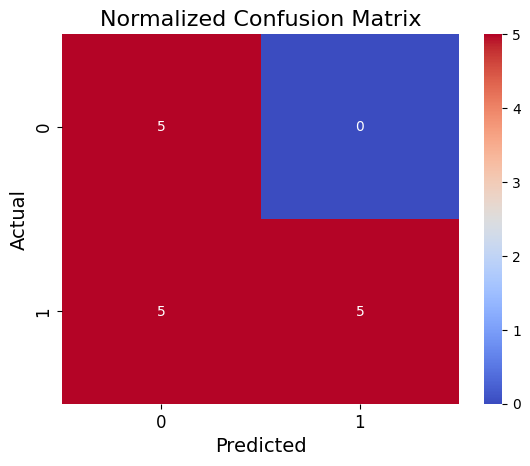

In [26]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")


plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Normalized Confusion Matrix", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

10. Display the accuracy

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


11. Display the precision

In [28]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

Precision: 0.8333333333333334


12. Display the recall

In [29]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

Recall: 0.6666666666666666


13. Display the f1-score

In [30]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.6666666666666666


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.50      0.67        10

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15



In [36]:
knn.predict([[0, 1, 0, 100]])

array([1])